# RL Assignment 2 

Andrei Chubarau, 260581375, andrei.chubarau@mail.mcgill.ca

Bonnie Hu, 260556970, guanqing.hu@mail.mcgill.ca

# Mandatory Questions

## Bellman Optimality Equations
Using a contraction argument, show that there exists a solution to the Bellman optimality equations. That is : show that the Bellman optimality operator is a contraction mapping. (Doina covered the linear case in class ; here you need to go through the same steps but in the nonlinear case).

## Policy Iteration 
Show that the values of two successive policies generated by policy iteration are nondecreasing. Assume a finite MDP and conclude (explain why) that policy iteration must terminate under a finite number of steps. Finally, show that upon termination, policy iteration must have found an optimal policy (ie. one which satisfies the optimality equations).


## Solutions

Firstly, we will start by giving some definitions.

Bellman equations can be rewritten using the Bellman Operator, which is defined as

$\begin{equation}
	(TV)(s) = \max_{a \in A} E[r_{t+1} + V^(s_{t+1}) | s_t=s,a_t=a]
\end{equation}$

For some given policy $\pi$, we can express the corresponding Bellman Operator as

$\begin{equation}
	(T_{\pi}V)(s) = E_\pi[r_{t+1} + V(s_{t+1}) | s_t=s]
\end{equation}$

Given the definitions above, Bellman Equations have the following form: $V_\pi = T_\pi V^\pi$ and $V^* = TV^*$.

Finally, Bellman Optimality Operator is given by

$(Tf) (s) = \max_{a \in A}[ r(s,a) + \gamma  \sum_{s^\prime}{p(s^\prime|s,a) f(s^\prime) } ]$

Now, we will proceed by proving that the Bellman Operator is monotonic, by showing that the following two inequalities hold:


$i)$ For all $V$, $V^"$, and a policy $\pi$ such that $V \leqslant V^"$, we have $T_\pi V \leqslant T_\pi V^" $

Proof:
By construction, we have that $V \leqslant V^\prime$, therefore
$(T_\pi V) = E_\pi[r_{t+1} + V(s_{t+1}) | s_t=s] \leqslant E_\pi[r_{t+1} + V^\prime(s_{t+1}) | s_t=s] = (T_\pi V^\prime) $

$ii)$ For all $V$, $V^"$, if $V \leqslant V^"$, we have $T V \leqslant T V^" $

Proof:
$(T V)(s) = \max_{a \in A} E[r_{t+1} + V(s_{t+1}) | s_t=s, a_t=a] \leqslant \max_{a \in A} E[r_{t+1} + V^"(s_{t+1}) | s_t=s, a_t=a] = (T_\pi V^")(s) $

We will now define a function relating to the termination time of the policy iteration algorithm as follows:

$\tau(s)=\max_{\pi} E_\pi [ termination\ time | s_0=s ] < \infty $


By definition, for any given policy $\pi$, $\tau(s)$ satisfies the following Bellman equation:

$\tau(s)=\max_{a \in A} E [ 1 + \tau(s_{t+1}) | s_t=s, a_t=a ] \geqslant E_\pi [1 + \tau(s_{t+1}) | s_t=s] $

To proceed with the proof, we will define a norm function. We will use the weighted max norm defined as

$||V||_{\infty,1/\tau} = \max_{s \in S} \frac{|V(s)|}{\tau(s)} $

Now, we will prove that both $T$ and $T_\pi$ are contraction mappings under the weighted max norm defined above. For this to be true, the following two conditions must be satisfied:

$i)$ For all $\pi$ and pairs $V$, $V^\prime$, we have

$||T_\pi V - T_\pi V^\prime||_{\infty,1/\tau} \leqslant \alpha || V - V^\prime||_{\infty,1/\tau}$

Given $\alpha = \max_{s \in S} \frac{\tau(s)-1}{\tau(s)}  $

Note that for a given policy $\pi$, and by the definitions above, we have

$E [ \tau(s_{t+1}) | s_t=s ] \leqslant \tau(s_t) - 1 \leqslant \alpha \tau(s) $

Then,

$||T_\pi V - T_\pi V^\prime||_{\infty,1/\tau} = \max_{s \in S} \frac{1}{\tau(s)} | E_\pi [V(s_{t+1}) - V^\prime(s_{t+1}) | s_t=s] | $

$||T_\pi V - T_\pi V^\prime||_{\infty,1/\tau} = \max_{s \in S} \frac{1}{\tau(s)} | \tau(s_{t+1}) \frac{E_\pi [V(s_{t+1}) - V^\prime(s_{t+1}) | s_t=s]}{\tau(s_{t+1})} | $

$||T_\pi V - T_\pi V^\prime||_{\infty,1/\tau} \leqslant \max_{s \in S} \frac{1}{\tau(s)} | \tau(s_{t+1}) E_\pi [\tau(s_{t+1}) | s_t=s] \times || V - V^\prime ||_{\infty,1/\tau}$

$||T_\pi V - T_\pi V^\prime||_{\infty,1/\tau} \leqslant \alpha || V - V^\prime||_{\infty,1/\tau}$

QED

$ii)$ For all pairs $V$, $V^\prime$, we have

$||T V - T V^\prime||_{\infty,1/\tau} \leqslant \alpha || V - V^\prime||_{\infty,1/\tau}$

Since

$ \max_{a \in A} E[\tau(s_{t+1}) | s_t=s, a_t=t] \leqslant \tau(s) - 1 \leqslant \alpha \tau(s) $

The following statements can be deduced

$ ||T V - T V^\prime||_{\infty,1/\tau} = \max_{s \in S} \frac{1}{\tau(s)} | \max_{a \in A} E[r_{t+1} + V(s_{t+1}) | s_t=s, a_t=a] - \max_{a \in A} E[r_{t+1} + V^\prime(s_{t+1}) | s_t=s, a_t=a ] | $

Now, since $|\max_{x \in R} f(x) - \max_{y \in R} g(y) | \leqslant \max_{z \in R} | f(z) - g(z) | $, we can simplify the above as

$ ||T V - T V^\prime||_{\infty,1/\tau} \leqslant \max_{s \in S, a \in A} | E [ V(s_{t+1}) - V^\prime(s_{t+1}) | s_t=s, a_t=a ] | $

$ ||T V - T V^\prime||_{\infty,1/\tau} \leqslant \alpha || V - V^\prime||_{\infty,1/\tau}$

The above proves that the Bellman optimality operator is a contraction mapping. $V^\pi$ is the unique fixed point of $T^\pi$, and $V^*$ is the unique fixed point of $T$. These statements show that a solution exists to the Bellman optimality operator.


---



We will now demonstrate the convergence of the policy iteration algorithm for MDPs with finite state and action sets.

Policy iteration algorithm essentially consists of two steps: i) policy evaluation, which calculates the value function $V^{\pi_k}$ of the current policy $\pi_k$, and ii) policy improvement, which produces a new policy \pi_{k+1}, which is given by

$\pi_{k+1}(s) = \max_{a \in A} [r(s,a) + \gamma \sum_{s^\prime}{p(s^\prime|s,a) V^{\pi_k}(s^\prime) }] $

Notice that the above expression is green w.r.t. the value function $V^{\pi_k}$.

Policy iteration terminates when $V^{\pi_k} = V^{\pi_{k+1}}$.

We will now show that the policy iteration algorithm converges to the optimal policy $\pi^*$ in finite numbers of steps. Furthermore, each iteration of the policy iteration algorithm produces an improved policy compared to the previous iteration. Such convergence properties of the algorithm are ensured by the monotonicity of the Bellman operator, which was proven above.

Let $V^{\pi_k}$ and $V^{\pi_{k+1}}$ represent values of policies given by two consecutive iterations of the algorithm.  

From the definition of policy iteration, we have

$V^{\pi_k} = T^{\pi_k} V^{\pi_k} \leqslant T V^{\pi_{k}} = T^{\pi_{k+1}} V^{\pi_k} $

Because of the monotonicity of $T^{\pi_{k+1}}$, and $V^{\pi_k} \leqslant T^{\pi_{k+1}} V^{\pi_k} $, we deduce that

$V^{\pi_k} \leqslant T^{\pi_{k+1}} V^{\pi_k} \leqslant (T^{\pi_{k+1}})^2 V^{\pi_k} \leqslant ... \leqslant \lim_{n \to \infty} (T^{\pi_{k+1}})^n = V^{\pi_{k+1}} $

Hence, policy must be improving.

The algorithm will terminate after a finite number of steps $s$, s.t. with $V^{\pi_s} = V^*$. 

Since there is a finite number of states and actions, the set of possible policies is also finite. Then, we can show that $V^{\pi_s}$ is a fixed point of $T$; since $T$ is monotonic, hence it has a unique fixed point.

$V^{\pi_s} = V^{\pi_s} = T^{\pi_{s+1}} V^{\pi_{s+1}} = T^{\pi_{s+1}} V^{\pi_s} = T V^{\pi_s} $

Given the uniqueness of the fixed point, we have that $V^{\pi_s} = V^*$, which implies that $\pi_s$ is the optimal policy.

# Track 1
Implement and compare empirically the performance of value iteration, policy iteration and modified policy iteration. Modified policy iteration is a simple variant of policy iteration in which the evaluation step is only partial. You can consult the Puterman (1994) textbook for more information. You should first implement the algorithms in a 2-states MDP specified as follows:

Transition Probabilities: P(s_0 | s_0, a_0) = 0.5, P(s_1 | s_0, a_0) = 0.5, P(s_0 | s_0, a_1) = 0, P(s_1 | s_0, a_1) = 1, P(s_1 | s_0, a_2) = 0, P(s_1 | s_1, a_2) = 1

(State s_0 has access to actions a_0 and a_1, while in state s_1 the agent can only choose a_2. As Preeti Vyas commented, the probabilities are simply zero for the actions that cannot be taken.)

Rewards: r(s_0, a_0) = 5, r(s_0, a_1) = 10, r(s_1, a_2) = -1
Discount factor : 0.95

Advice: Implement these algorithms in matrix form. Your code will be much more succinct.

Also run your experiments in a second MDP of your choice (chain MDP, grid world, etc.). Explain and explore how the convergence rate of these algorithms is affected by the discount factor.


## MDP Classes
A general MDP class has been built. Two-state MDP and Grid World MDP were extended from MDP class. 

### Two-state 

The implementation follows closely the requirements listed above. 

### Gridworld
Grid World MDP is flexible in dimension and terminal states. All the transitions have reward -1, except moving into terminal state(s) where the reward is 0. 

In [0]:
import numpy as np
import matplotlib.pyplot as plt

class MDP:
    # generic mdp class
    def __init__(self,
                 gamma):
        self.states = []
        self.terminal = []
        self.actions = []
        self.p = []
        self.r = None
        self.v = []
        self.gamma = gamma
        self.synchronize = True
        

class TwoStateMdp(MDP):
    def __init__(self,
                 gamma=0.95):
        MDP.__init__(self, gamma)

        self.states = [0, 1]
        self.actions = [0, 1, 2]
        
        # distribution p(s0|s0,a0), p(s0|s0,a2), ... 
        self.p = np.array([[[0.5, 0, 0], [0.5, 1, 0]], [[0, 0, 0], [0, 0, 1]]], np.float)
        # rewards r(s, a)
        self.r = np.array([[5, 10, 0], [0, 0, -1]], np.float)
        # initial value and policy
        self.v = np.array([0, 0], np.float)
        # 1 means valid action, 0 means invalid
        self.pi = np.array([[1, 1, 0], [0, 0, 1]], np.float)

        
class GridStateMdp(MDP):
    def __init__(self,
                 gamma=0.95, dimension=4):
        MDP.__init__(self, gamma)

        self.dimension = dimension
        self.states = list(range(dimension**2))
        self.actions = [0, 1, 2, 3]
        # terminal states, by default, are left top and right bottom cells
        self.terminal=[0,self.dimension**2-1]

        self.synchronize = False
        
        # create distribution and rewards
        p = []
        r = []
        for s in self.states: 
            # find its neighbours: [left, right, up, down]
            nb = [s-1, s+1, s-4, s+4]
            nb = [x if (x in self.states) else s for x in nb]
            if s%4==0:
                nb[0] = s
            elif s%4==3:
                nb[1] = s
            p_s2_s_a = []
            for next_state in self.states:
                if (next_state in nb) and  (s not in self.terminal): 
                    p_s2_s_a.append([0.25 if x==next_state else 0 for x in nb])
                else: 
                    p_s2_s_a.append([0, 0, 0, 0])
            p.append(p_s2_s_a)
            r.append([0 if x in self.terminal else -1 for x in nb])
        self.p = np.array(p, np.float)        
        self.r = np.array(r, np.float)
        
        self.v = np.array([0 for _ in self.states], np.float)
        self.pi = np.array([[1, 1, 1, 1] if x not in self.terminal else [0, 0, 0, 0] for x in self.states], np.float)
       

## Polict Evaluation and Policy Improvement

Policy evaluation is iterative. Modified policy evaluation limited the ammount of iterative steps to a certain value instead of using the threshold. 

In [0]:
# policy evaluation
def e(mdp, threshold, k=0, verbose=False):
    error = 0
    flag = True
    count = 0
    while (flag or (error > threshold)):
        count += 1
        flag = False
        error = 0
        new_values = []

        for s in mdp.states:
            v_old = mdp.v[s]
            v_new = 0

            for next_state in mdp.states:
                v_new += mdp.p[s, next_state].dot(mdp.r[s] + mdp.gamma * mdp.v[next_state])

            if mdp.synchronize:
                mdp.v[s] = v_new
            else:
                new_values.append(v_new)

            error = max(error, abs(v_old - v_new))

        if mdp.synchronize == False:
            # print('Asynchronize value updating.')
            mdp.v = new_values

        if (k>0) and (count>=k):
            break

        if verbose:
            print(mdp.v)
            print(error)

    #print "Number of iteration in policy evaluation = ", count 
    return count

            
# policy improvement
def i(mdp):
    #print('Policy is', mdp.pi)
    policy_stable = True
    
    for s in mdp.states:
        if s in mdp.terminal:
            continue
            
        old_action = mdp.pi[s].copy()
        q = {}
        for a in mdp.actions:
            if old_action[a]==0:
                continue
            else:
                qa = sum([mdp.p[s,s2,a] * (mdp.r[s,a] + mdp.gamma*mdp.v[s2]) for s2 in mdp.states])
                q[a] = qa
          
        for a in q.keys():
            qm = max(q.values())
            if q[a]==qm:
                mdp.pi[s,a] = 1
            else:
                mdp.pi[s,a] = 0

        if not np.array_equal(old_action, mdp.pi[s]):
            policy_stable = False

    return policy_stable

## Policy Iteration (with Modified Policy Iteration option)

Policy iteration starts with policy evaluation, then policy improvement. Algorithm keepd running until there is no action change detected in policy improvement, meaning that the policy is optimal. 

In [0]:
def policy_iteration(mdp, threshold=0.001, k=0):
    policy_improve_count = 0
    policy_stable = False
    
    policy_evaluation_step_count = []
    while (policy_stable == False):
        policy_evaluation_step_count.append(e(mdp, threshold, k=k))
        policy_stable = i(mdp)
        policy_improve_count += 1

    return policy_improve_count, policy_evaluation_step_count

## Value Iteration 

Value iteration only has two differences from policy iteration. First, it only does policy evaluation and improvement once. Second, in policy evaluation, it updates the state value with the maximum possible state value instead of the expectation value. 

In [0]:
def value_iteration(mdp, threshold = 0.001, verbose=False):
    
    error = 0
    flag = True
    
    while (flag or (error > threshold)):
        flag = False
        error = 0
        new_values = []
        
        for s in mdp.states:
          
            if s in mdp.terminal:
                new_values.append(0)
                continue
                
            v_old = mdp.v[s]
            old_action = mdp.pi[s].copy()
            q = {}
            for a in mdp.actions:
                if old_action[a] == 0:
                    continue
                else:
                    qa = sum([mdp.p[s, s2, a] * (mdp.r[s, a] + mdp.gamma * mdp.v[s2]) for s2 in mdp.states])
                    q[a] = qa
            
            qm = max(q.values())
            if mdp.synchronize:
                mdp.v[s] = qm
            else:
                new_values.append(qm)
                
            error = max(error, abs(v_old - qm))

            for a in q.keys():
                if q[a] == qm:
                    mdp.pi[s, a] = 1
                else:
                    mdp.pi[s, a] = 0
                    
        # update all values at the end for asynchronize
        if mdp.synchronize == False:
            # print('Asynchronize value updating.')
            mdp.v = new_values
            
        if verbose:
            print(mdp.v)
            print(error)

## Test1 (Two States)

Test of two-state MDP consists of two main parts: comparison of three algorithms and discount factor tuning. 

Policy iteration, modified policy iteration, and value iteration were testd. Nice discount factors from 0.1 to 0.9 were tested using policy iteration algorithm. 

In [0]:
def test_2state():
  
    # create two-state MDP object
    mdp = TwoStateMdp(gamma=0.95)
    # run policy iteration
    pim, pe = policy_iteration(mdp, threshold=0.001)
    print '#policy improvement steps = ', pim
    print '#policy evaluation steps = ', pe
    print 'v* = ', mdp.v, '\npi* = ', mdp.pi

    # run modified policy iteration
    mdp = TwoStateMdp(gamma=0.95)
    pim, pe = policy_iteration(mdp, threshold=0.001, k=20)
    print '#policy improvement steps = ', pim
    print '#policy evaluation steps = ', pe
    print 'v* = ', mdp.v, '\npi* = ', mdp.pi 

    # run value iteration
    mdp = TwoStateMdp(gamma=0.95)
    value_iteration(mdp)
    print 'Value iteration done.' 
    print 'v* = ', mdp.v, '\npi* = ', mdp.pi
    
    
    gammas = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    pim_count = []
    pe_count = []
    for gamma in gammas:
        mdp = TwoStateMdp(gamma=gamma)
        # run policy iteration
        pim, pe  = policy_iteration(mdp, threshold=0.001)
        #print 'policy improvement steps = ', pim
        #print 'max policy evaluation steps = ', pe
        print 'GAMMA = ', gamma, '  v* = ', mdp.v, '\npi* = ', mdp.pi[0], mdp.pi[1]
        pim_count.append(pim)
        pe_count.append(max(pe))
        
    plt.plot(gammas, pim_count, '*--', label='Policy Improvement Steps')
    plt.plot(gammas, pe_count, '*--', label='Max Policy Evaluation Steps')
    plt.ylabel('Number of steps')
    plt.xlabel('Gamma')
    plt.title("Influence of Gamma on Policy improvement and evaluation convergence")
    plt.legend()
    plt.show()
    

## Test1 Results

* With fixed gamma=0.95, all the three algorithms returned same optimal policy [[0,1,0],[0,0,1]] which means choosing a1 in State1 and a2 in State2. The state values ($v^*$) they got are different because their ways of policy evaluations are different. 
* Discount factor influences converging rate. Lower discount factor tends to converge faster. As can be seen from the last part of test results. When gamma increases from 0.1 to 0.9, the convergence of policy evaluation takes increasing number of iterations, while the total number of policy improvement remained stable at 2 due to the simplicity of the two-state MDP. 
* Discount factor directly influences policy evaluation, therefore influences the optimal policy ($pi^*$) and state values ($v^*$). When gamma is between 0.5 and 0.9, the optimal policy tends to choose a0 in State1, while when gamma < 0.5 or gamma > 0.9, the optimal policy chooses a1 instead. These results are very resonable because when the agent chooses to take a0, there is half of chance getting into State2 with a reward of 5 and stuck there with negative rewards forever. Comparing to choose a1 with a reward of 10 and stuck in State2, choosing a0 has to take a risk of less cummulative rewards. Especially, when the discount factor is small, it means that even the agent lucky enough to stay in State0 after choosing a0, the reward it can get from the next step will be discounted too much and does not worth the risk, comparing to choose a1 directly and get 10 at once. For this reason, the agent only chooses a0 when the discount factor is high enough to balance out the risk. 

#policy improvement steps =  2
#policy evaluation steps =  [158, 1]
v* =  [-25.69705892 -19.99425773] 
pi* =  [[0. 1. 0.]
 [0. 0. 1.]]
#policy improvement steps =  2
#policy evaluation steps =  [20, 20]
v* =  [-18.00355632 -17.42975687] 
pi* =  [[0. 1. 0.]
 [0. 0. 1.]]
Value iteration done.
v* =  [ -8.98131727 -19.98131727] 
pi* =  [[0. 1. 0.]
 [0. 0. 1.]]
GAMMA =  0.1   v* =  [15.6140625 -1.1111   ] 
pi* =  [0. 1. 0.] [0. 0. 1.]
GAMMA =  0.2   v* =  [16.250046 -1.249984] 
pi* =  [0. 1. 0.] [0. 0. 1.]
GAMMA =  0.3   v* =  [16.89083984 -1.42854331] 
pi* =  [0. 1. 0.] [0. 0. 1.]
GAMMA =  0.4   v* =  [17.50020925 -1.66659676] 
pi* =  [0. 1. 0.] [0. 0. 1.]
GAMMA =  0.5   v* =  [18.00036612 -1.99987793] 
pi* =  [1. 0. 0.] [0. 0. 1.]
GAMMA =  0.6   v* =  [18.2150474 -2.4997461] 
pi* =  [1. 0. 0.] [0. 0. 1.]
GAMMA =  0.7   v* =  [17.69364876 -3.33288631] 
pi* =  [1. 0. 0.] [0. 0. 1.]
GAMMA =  0.8   v* =  [15.00311538 -4.99896154] 
pi* =  [1. 0. 0.] [0. 0. 1.]
GAMMA =  0.9   v* =  [ 2.73536438

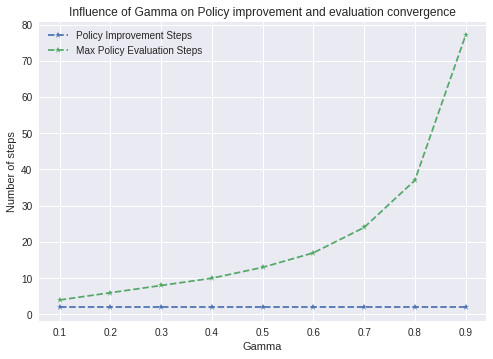

In [146]:
test_2state()

## Test2 (Grid World)

Test of gridworld MDP has similar structure as two-state MDP. 

Policy iteration, modified policy iteration, and value iteration were testd. Nice discount factors from 0.1 to 0.9 were tested using policy iteration algorithm. 

Two different dimension of grid worlds are tested (4x4 and 10x10). 

In [0]:
def test_grid(dimension=4):
    
    # create grid world object
    mdp = GridStateMdp(gamma=0.95, dimension=dimension)

    # run policy iteration
    pim, pe = policy_iteration(mdp, threshold=1)
    print 'policy improvement steps = ', pim
    print 'max policy evaluation steps = ', pe
    print 'v* = ', mdp.v #, '\npi* = ', mdp.pi

    # run value iteration
    mdp = GridStateMdp(gamma=0.95, dimension=dimension)
    value_iteration(mdp)
    print 'Value iteration done.'
    print 'v* = ', mdp.v #, '\npi* = ', mdp.pi
    
    pi_opt = mdp.pi

    gammas = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    pim_count = []
    pe_count = []
    for gamma in gammas:
        mdp = GridStateMdp(gamma=gamma, dimension=dimension)
        # run policy iteration
        pim, pe = policy_iteration(mdp, threshold=0.001)
        #print 'policy improvement steps = ', pim
        #print 'max policy evaluation steps = ', pe
        pim_count.append(pim)
        pe_count.append(max(pe))
        if mdp.pi.all()==pi_opt.all():
          print 'Gamma = ', gamma, 'Same optimal policy found. '
        else: 
          print 'Gamma = ', gamma, 'Different optimal policy found. '
    
    plt.plot(gammas, pim_count, '*--', label='Policy Improvement Steps')
    plt.plot(gammas, pe_count, '*--', label='Max Policy Evaluation Steps')
    plt.ylabel('Number of steps')
    plt.xlabel('Gamma')
    plt.title("Influence of Gamma on Policy improvement and evaluation convergence")
    plt.legend()
    plt.show()
          

## Test2 results of 4x4 grid world

* All the three algorithms get the same optimal policy. Policy iteration using different discount factors end up with the same optimal policy as well.
* Lower discount factor helps policy evaluation converges faster. The influence of discount factor on the convergence of policy improvement is hard to tell. This has been tested with a higher dimensional grid world. 

policy improvement steps =  4
max policy evaluation steps =  [1, 1, 1, 1]
v* =  [0.0, -2.47625390625, -3.4386240234375, -3.6280859374999994, -2.47625390625, -3.249162109375, -3.51809375, -3.4386240234375, -3.4386240234375, -3.51809375, -3.249162109375, -2.4762539062499997, -3.6280859374999994, -3.4386240234375, -2.4762539062499997, 0.0]
Value iteration done.
v* =  [0, 0.0, -0.25, -0.309375, 0.0, -0.25, -0.309375, -0.25, -0.25, -0.309375, -0.25, 0.0, -0.309375, -0.25, 0.0, 0]
Gamma =  0.1 Same optimal policy found. 
Gamma =  0.2 Same optimal policy found. 
Gamma =  0.3 Same optimal policy found. 
Gamma =  0.4 Same optimal policy found. 
Gamma =  0.5 Same optimal policy found. 
Gamma =  0.6 Same optimal policy found. 
Gamma =  0.7 Same optimal policy found. 
Gamma =  0.8 Same optimal policy found. 
Gamma =  0.9 Same optimal policy found. 


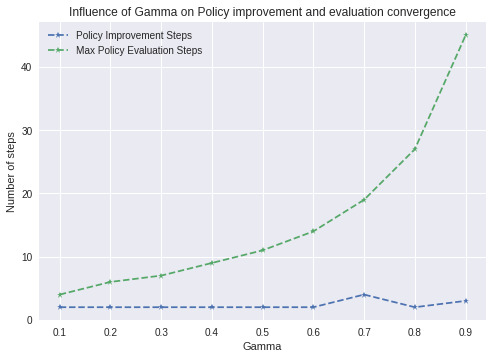

In [148]:
test_grid()

## Test2 results of 10x10 grid world
* Discount factor does not influence the value of optimal policy. 
* Lower discount factor helps the convergence of each around of policy evaluation, but increases the converge time of policy improvement. When gamma=0.9, it takes 67 loops for the first policy evaluation to converge, but only 2 rounds to get the optimal policy.  

policy improvement steps =  13
max policy evaluation steps =  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
v* =  [0.0, -5.506817600305079, -8.049969333497831, -8.934163793689404, -5.520769462376435, -7.42231320480724, -8.647655147190875, -9.169338010322928, -8.111316205505972, -8.687272119583302, -9.178883619641915, -9.42108925116431, -9.13687327175305, -9.314498456841669, -9.493006862687931, -9.590423817972482, -9.529145034089037, -9.583013304409103, -9.643217751082679, -9.677963856949297, -9.669507395014353, -9.68533599924544, -9.703819998971111, -9.7151370374208, -9.715444604598074, -9.719693067346475, -9.724998210722072, -9.728197132219695, -9.72882720061632, -9.72991396309089, -9.731204693856562, -9.732051917394752, -9.732257546633967, -9.732482790030671, -9.732786199372804, -9.73295839200944, -9.733000286452128, -9.733047569821519, -9.733097554444335, -9.733133515625447, -9.73313663425886, -9.733142793528538, -9.733152103015069, -9.733156031539963, -9.733155959986522, -9.7331570015931

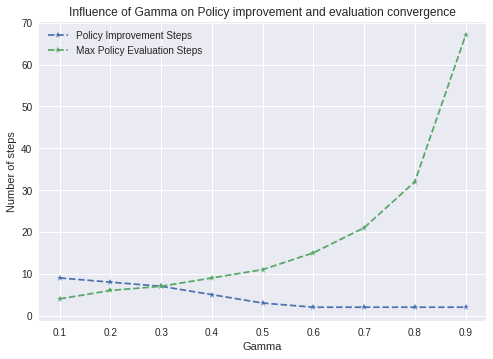

In [149]:
test_grid(dimension=10)

## Conclusion 

Policy iteration takes the longest time to converge, while value iteration and modified policy iteration takes shorter time because they benefit from estimation. 

The influence of discount factor has been discussed above in test result sections. Overall, with low discount factors, policy evaluation converges faster due to a large discount in each step. But policy improvement takes longer time to converge because the state values become less realistic (less distinguishable) due to the large discount.   